### Домашнее задание "Случайные марковские процессы"  

1. Скачайте текст войны и мир. Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов  

2. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [258]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

##### Скачайте текст войны и мир. Очистите его, оставив только русские буквы и символы пробела. 

In [259]:
#Попробовал несколько разных комбаниаций комбанд regex и именно эти три позволяют убрать все разрывы строк и лишиние пробелы.

with open('war_and_peace/tom_1.txt', 'r') as f:
    tom1 = f.read().lower()
tom1 = re.sub('\s+',' ', tom1)
tom1 = re.sub('[^а-я ]','', tom1)
tom1 = re.sub(' +',' ', tom1)

with open('war_and_peace/tom_2.txt', 'r') as f:
    tom2 = f.read().lower()
tom2 = re.sub('\s+',' ', tom2)
tom2 = re.sub('[^а-я ]','', tom2)
tom2 = re.sub(' +',' ', tom2)

with open('war_and_peace/tom_3.txt', 'r') as f:
    tom3 = f.read().lower()
tom3 = re.sub('\s+',' ', tom3)
tom3 = re.sub('[^а-я ]','', tom3)
tom3 = re.sub(' +',' ', tom3)
    
with open('war_and_peace/tom_4.txt', 'r') as f:
    tom4 = f.read().lower()
tom4 = re.sub('\s+',' ', tom4)
tom4 = re.sub('[^а-я ]','', tom4)
tom4 = re.sub(' +',' ', tom4)   




In [260]:
#Проверяем
tom1[:500]

' лев толстой война и мир том том часть первая часть орая часть третья том лев николаевич толстой война и мир том часть первая е поместья мой верный раб ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуй'

In [261]:
# Все полученные файлы начинаются с пробелма и поэтому мы можем их просто сложить, чтобы получить один единый файл
war_peace = tom1 + tom2 + tom3 + tom4

In [262]:
str_count = war_peace.count('ё')
str_count

0

##### Постройте матрицу переходных вероятностей. 

In [263]:
#Поскольку в тексте нет буквы "ё", то мы ее не будем включать
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [264]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [265]:
for cp, cn in zip(war_peace[:-1], war_peace[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [266]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [267]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

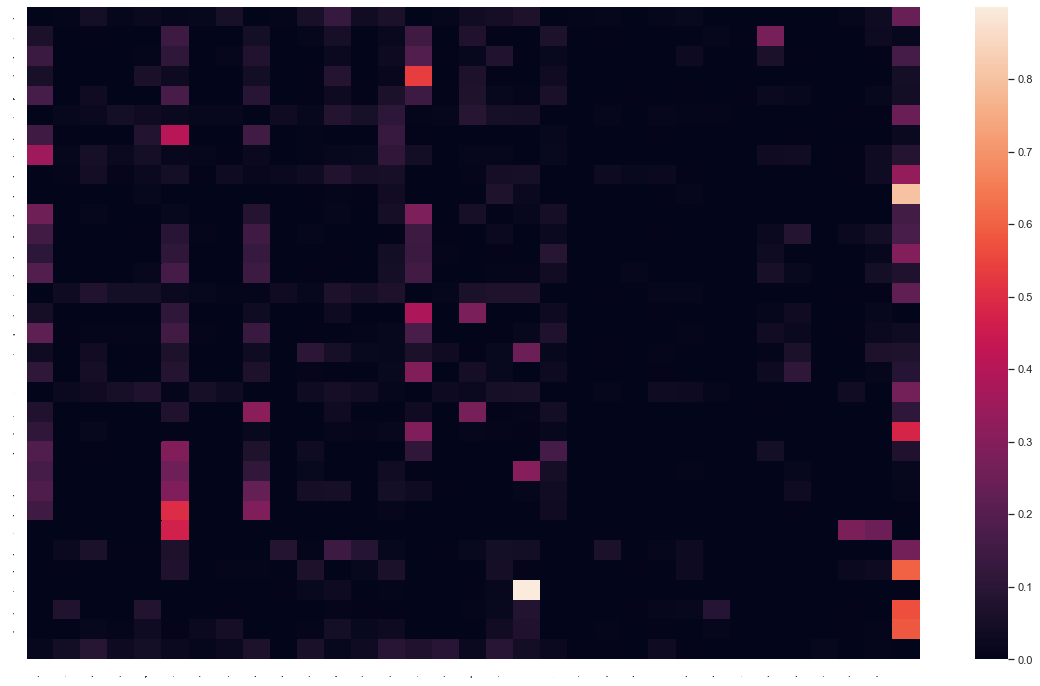

In [268]:
# Почему-то если строить тепловую карту с такими данными, то на осях не отоброжаются буквы, 
# хоть и пробовал применять разные настройки

x_axis_labels = df.columns # labels for x-axis
y_axis_labels = df.columns # labels for y-axis

plt.figure(figsize=(20,12))
sns.heatmap(df, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

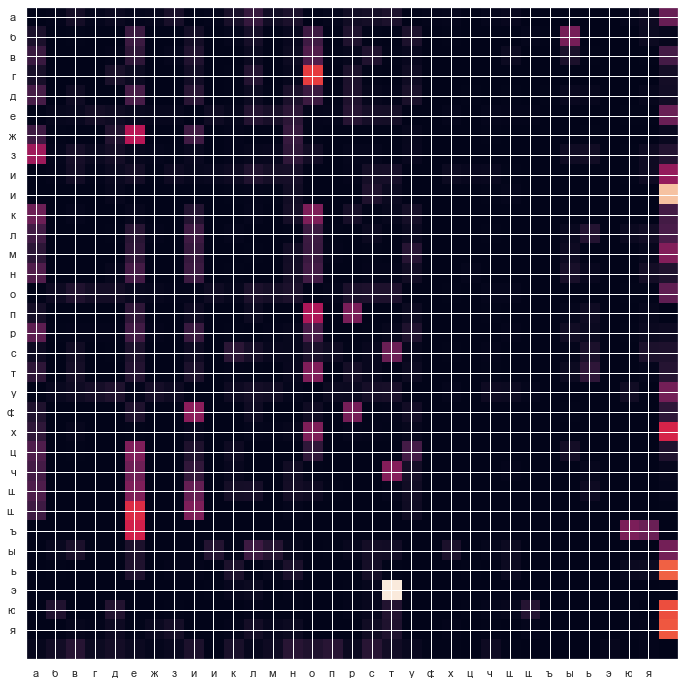

In [269]:
# В просто matplotlib удалось построить тепловую карту с отображением букв, но она получилась менее симпатичная
plt.figure(figsize=(20,12))

ax = plt.subplot()
plt.imshow(df)
ax.set_yticks(range(len(RUSSIAN)-1))
ax.set_xticks(range(len(RUSSIAN)-1))
ax.set_xticklabels(df.columns )
ax.set_yticklabels(df.columns )

plt.show()

##### Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 

In [170]:
start = POS['п']
second_letter = POS['а'] # добавим новую переменную для второй буквы и далее внесем ее в уравнение, которое было дано на лекции
end = POS['р']
prior = 1. / len(RUSSIAN[:-1]) # [:-1] чтобы не включать пробел
for c in RUSSIAN[:-1]:
    proba = prior * probabilities[start, second_letter] * probabilities[second_letter, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['па', c, 'р']), proba)

паар 7.864091984078808e-09
пабр 1.0646231026477177e-06
павр 1.2127325411072702e-06
пагр 1.3483994476053224e-06
падр 3.102216971847548e-06
паер 2.063217810962816e-06
пажр 7.761561783418316e-09
пазр 1.2823609438723676e-06
паир 2.3991216693006553e-08
пайр 2.529970570207758e-08
пакр 5.102251360779224e-06
памр 1.0647043505739574e-07
панр 1.1838569836343657e-07
паор 9.324429293291867e-09
папр 5.81243372515231e-06
парр 2.7766650487140692e-08
паср 5.30929913341273e-07
патр 5.867161417726677e-06
паур 7.098541595585284e-08
пафр 3.358694049221653e-06
пахр 2.5525122451200045e-07
пачр 2.6931108592057014e-08
пашр 5.588663434493503e-09
пащр 4.829236929288637e-09
паэр 9.038376048462093e-11
паюр 1.6905803053461412e-07
паяр 1.4765837633541613e-07


##### Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [256]:
# Если генерировать вместе с пробелом, то получается
slovo = ['б']

length = 7
for i in range(length):
    index = POS[slovo[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    slovo.append(next_char)

print (''.join(slovo))

б миски 


### 2. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [273]:
pip install hmmlearn

  Using cached hmmlearn-0.2.5.tar.gz (149 kB)
  Created wheel for hmmlearn: filename=hmmlearn-0.2.5-cp37-cp37m-macosx_10_13_x86_64.whl size=116911 sha256=c568d2ded7d611a4400b7158e6c8e3d5e86cc1cfd9e85d864ff289094b76b1e2
  Stored in directory: /Users/Dmitry/Library/Caches/pip/wheels/2e/2d/2d/0e35c6744eab0822461507fea0616e2a7957c6737a4dd6717c
Successfully built hmmlearn
Note: you may need to restart the kernel to use updated packages.


In [274]:
from hmmlearn.hmm import GaussianHMM

In [ ]:
series = pd.read_csv("../1. Лекция/Series/daily-total-female-births-in-cal.csv")["Count"]

In [284]:
airlines_passengers = pd.read_csv("/Users/Dmitry/Downloads/Временные ряды/1._Лекция/Series/international-airline-passengers.csv")["Count"]

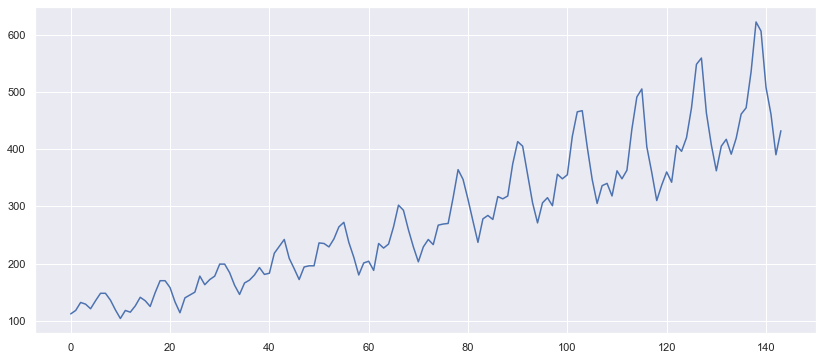

In [285]:
plt.figure(figsize=(14,6))
plt.plot(airlines_passengers)
plt.show()

In [286]:
values = airlines_passengers.values.reshape(-1,1)

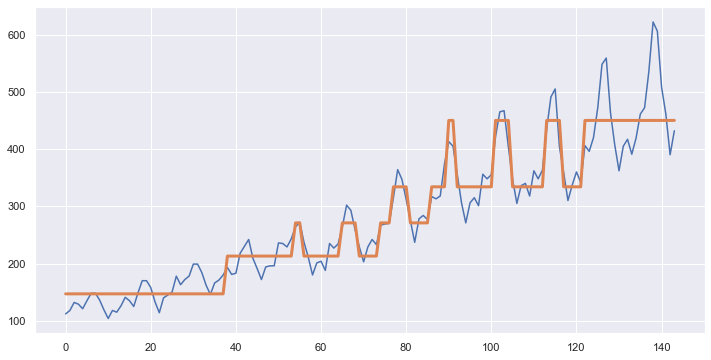

In [303]:
# Попробуем построить модели с 5, 10 и 20 компонентами

model_5 = GaussianHMM(n_components=5,
                        covariance_type="diag",
                        n_iter=1000)
model_5.fit(values)
labels = model_5.predict(values)
means_5 = np.zeros_like(values)
for i in range(model_5.n_components):
    means_5[labels == i] = model_5.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means_5, linewidth=3)

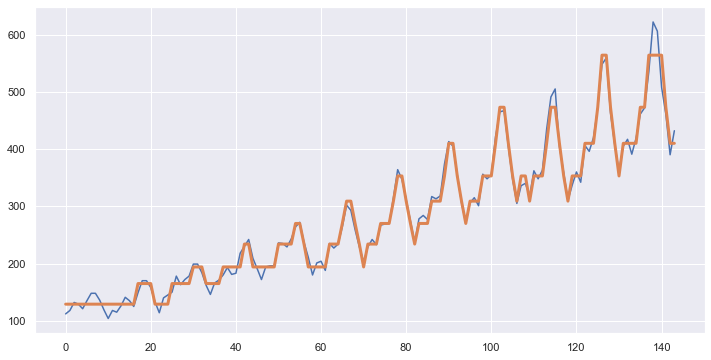

In [304]:
model_10 = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model_10.fit(values)
labels = model_10.predict(values)
means_10 = np.zeros_like(values)
for i in range(model_10.n_components):
    means_10[labels == i] = model_10.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means_10, linewidth=3)

Fitting a model with 439 free scalar parameters with only 144 data points will result in a degenerate solution.


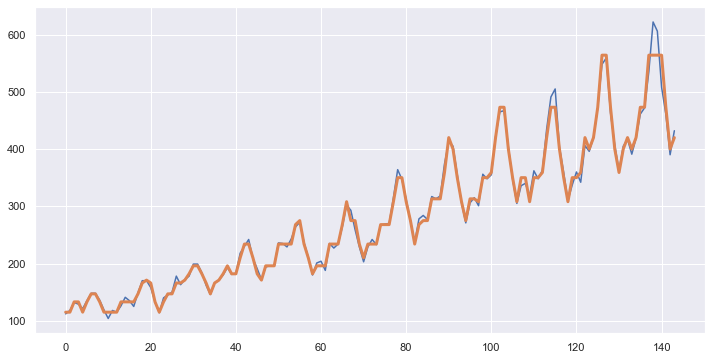

In [305]:
model_20 = GaussianHMM(n_components=20,
                        covariance_type="diag",
                        n_iter=1000)
model_20.fit(values)
labels = model_20.predict(values)
means_20 = np.zeros_like(values)
for i in range(model_20.n_components):
    means_20[labels == i] = model_20.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means_20, linewidth=3)

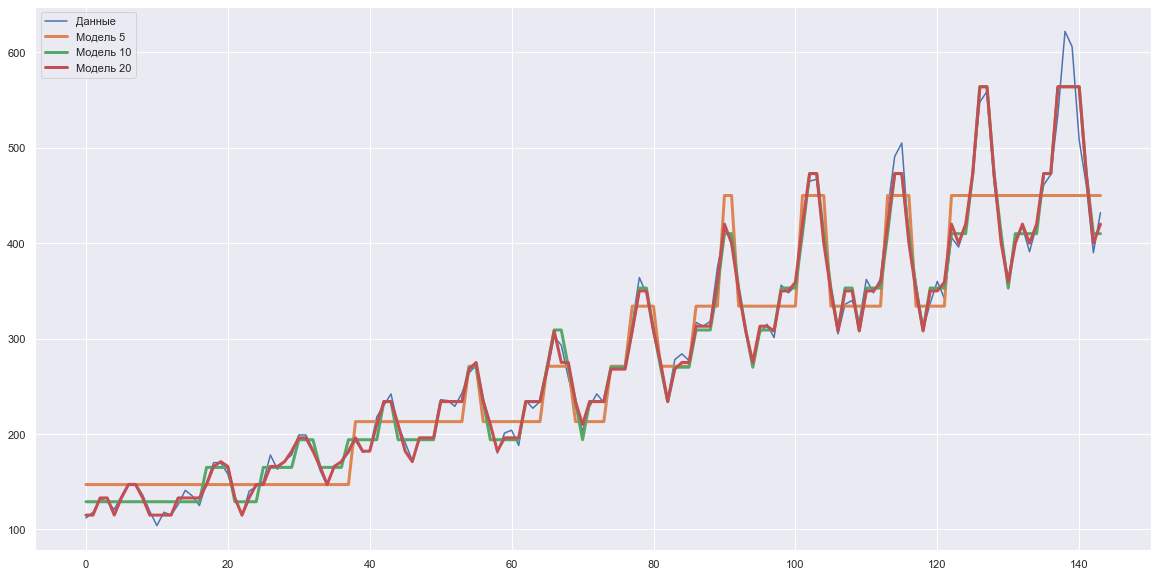

In [309]:
# Изобразим значения моделей вместе
plt.figure(figsize=(20, 10))
plt.plot(values)
plt.plot(means_5, linewidth=3)
plt.plot(means_10, linewidth=3)
plt.plot(means_20, linewidth=3)
plt.legend(['Данные', 'Модель 5', 'Модель 10', 'Модель 20'])